## Dataset load

In [54]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [55]:
def ImageSave(path, image_arr, file_name):
    image = Image.fromarray(image_arr)
    image.save(os.path.join(path, file_name))


In [56]:
PATH = '/root/scikit_learn_data'

data = []
type_path = os.path.join(PATH, 'test')
os.makedirs(type_path, exist_ok=True)

# image_save
for i, (image, label) in enumerate(zip(x_test, y_test)):
    filename = str(i) + '.jpg'
    ImageSave(type_path, image, filename)
    data.append([filename, label])

df = pd.DataFrame(data)  
df.to_csv(os.path.join(type_path, 'labels.csv'), index=False)

print('test done')

test done


In [58]:
PATH = '/root/scikit_learn_data'

data = []
type_path = os.path.join(PATH, 'train')
os.makedirs(type_path, exist_ok=True)

# image_save
for i, (image, label) in enumerate(zip(x_train, y_train)):
    filename = str(i) + '.jpg'
    ImageSave(type_path, image, filename)
    data.append([filename, label])
    
df = pd.DataFrame(data)   
df.to_csv(os.path.join(type_path, 'labels.csv'), index=False)
print('train done')

ValueError: unknown file extension: 

784

# Scoring

In [50]:
import sklearn
from sklearn.metrics import accuracy_score

import pandas as pd
import random

label_path = '/root/scikit_learn_data/test/labels.csv'
labels = pd.read_csv(label_path)

num = [i for i in range(10)]
randoms = [random.choice(num) for _ in range(len(labels))]

acc = accuracy_score(randoms, labels)
print(round(acc, 5))

0.10085


In [ ]:
num



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Train

In [17]:
# 필요한 라이브러리들을 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import Sequence

In [19]:
class Dataloader(Sequence):

    def __init__(self, dataset_path, label_path):
        self.dataset_path = dataset_path 
        self.label_path = label_path

    def load_images(self, path):
        images = []
        file_list = os.listdir(path)
        
        for file in file_list[:10]:
            if os.path.splitext(file)[-1] == '.jpg':
                images.append(plt.imread(os.path.join(path, file)))
        return np.array(images)

    def load_labels(self, path):
        path = os.path.join(path, 'labels.csv')
        return pd.read_csv(path)
    
    def get_datasets(self, file='train'):
        path = os.path.join(self.dataset_path, file)
        print(path)
        datasets = self.load_images(path)
        labels = self.load_labels(path)
        return (datasets, labels)

In [31]:
# 데이터를 로드합니다.
print('load data')
datasets = Dataloader('/root/scikit_learn_data', 'labels.csv')

x_train, y_train = datasets.get_datasets('train')
print(len(x_train))
x_test, y_test = datasets.get_datasets('test')

# 입력 데이터를 [0, 1] 범위로 정규화합니다.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 딥력데이터의 모양을 바꿉니다.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 레이블을 one-hot 인코딩합니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

load data
/root/scikit_learn_data/train
10
/root/scikit_learn_data/test


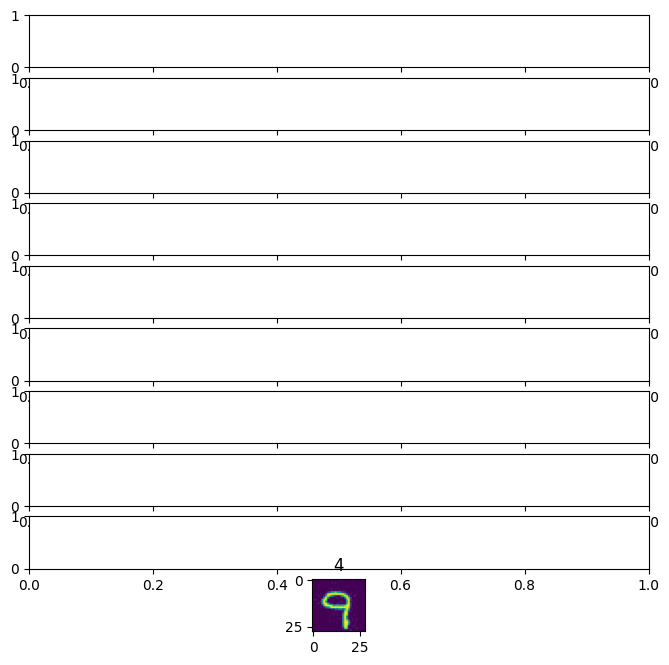

In [45]:
# 그림 생성 및 축 설정
fig, axes = plt.subplots(10, 1, figsize=(8, 8))

for img, label in zip(x_train, y_train):
    plt.imshow(img.reshape(28 , 28))
    plt.title(np.argmax(label))
plt.show()

In [30]:
test = x_train.reshape(-1, 28, 28, 1)
test.shape

(10, 28, 28, 1)

In [40]:
max = 0
for x in x_train[0]:
    for y in x:
        if max < y[0]:
            max = y[0]

print(max)

1.0
